In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
file_name='/home/ProjB2125/Desktop/Project/Monthly_mean_SN_number.txt'
with open(file_name,'r') as f:
  lines=f.readlines()
  data = [line.strip().split() for line in lines if line.strip()]

In [3]:
columns = ["Year", "Month", "Date in fraction", "SN", "Standard Deviation", "No of observations", "D"]

In [4]:
df = pd.DataFrame(data, columns=columns)
df.insert(0, 'date', df['Year'].astype(str) + '-' + df['Month'].astype(str))
df = df.set_index('date')

In [5]:
DF = df.copy()

In [6]:
# Convert to numeric, set errors to NaN
DF['SN'] = pd.to_numeric(DF['SN'], errors='coerce')

# Winsorize upper 0.1% of values
ssn_w = winsorize(DF['SN'].to_numpy(), limits=(0.000, 0.001)) 

# Add winsorized values to DataFrame
DF['SN_winsorized'] = pd.Series(ssn_w, index=DF.index)

In [7]:
# Convert 'SN' column to numeric, set errors to NaN
df['SN'] = pd.to_numeric(df['SN'], errors='coerce')

# Convert index to datetime with format YYYY-MM, set errors to NaT
df.index = pd.to_datetime(df.index, format="%Y-%m", errors='coerce')

# Convert index of DF to datetime with format YYYY-MM, set errors to NaT
DF.index = pd.to_datetime(DF.index, format="%Y-%m", errors='coerce')

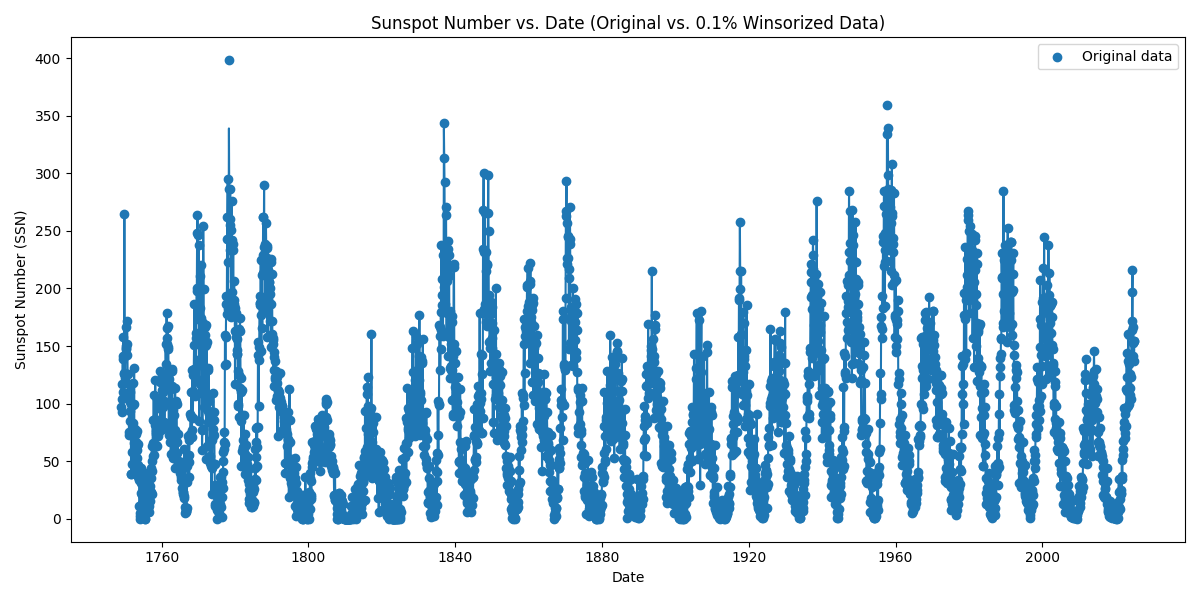

In [13]:
%matplotlib widget

# Convert 'SN' column to numeric, set errors to NaN
df['SN'] = pd.to_numeric(df['SN'], errors='coerce')

# Plot original and winsorized Sunspot Number (SSN)
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['SN'], label='Original data')                        # Original data
#plt.scatter(DF.index, DF['SN_winsorized'], label='Winsorized data') 
plt.plot(DF.index, DF['SN_winsorized'])# Winsorized data
plt.xlabel('Date')
plt.ylabel('Sunspot Number (SSN)')
plt.title('Sunspot Number vs. Date (Original vs. 0.1% Winsorized Data)')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import os

# Define the output directory and file path
output_dir = '/home/ProjB2125/Desktop/Project/Winsorised/'
output_path = os.path.join(output_dir, '0.1per_wins.csv')

os.makedirs(output_dir, exist_ok=True)

# Save df_combined to a CSV file
DF.to_csv(output_path, index=True)

print(f"DataFrame saved to {output_path}")

DataFrame saved to /home/ProjB2125/Desktop/Project/Winsorised/0.1per_wins.csv
